https://www.irit.fr/~Dominique.Longin/wp-content/uploads/sites/11/2019/11/coursIFI2016-02-LogiqueFloue.pdf

In [1]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

* X axis

In [2]:
start = 0
stop = 10 + 0.001
step = 0.25
x = np.arange(start, stop, step)
print(x)
print(len(x))

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ]
41


In [3]:
fig_scale = 3
plt.figure(figsize=(6.4 * fig_scale*20,4.8*fig_scale))

<Figure size 27648x1036.8 with 0 Axes>

<Figure size 27648x1036.8 with 0 Axes>

## Variable Service

In [4]:
# Membership function for  Service
s_mauvais = fuzz.trapmf(x,[0,0,2,4])
s_bon = fuzz.trapmf(x,[3,5,6,8])
s_excellent = fuzz.trapmf(x,[7,9,10,10])

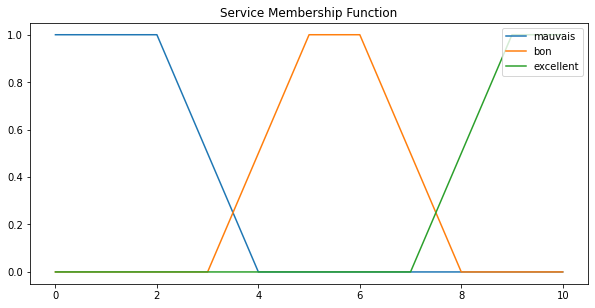

In [5]:

plt.figure(figsize=(10,4.8))
plt.title("Service Membership Function")
plt.plot(x, s_mauvais, label="mauvais")
plt.plot(x, s_bon, label="bon")
plt.plot(x, s_excellent, label="excellent")
plt.legend(loc="upper right")

### Variable Nourriture

In [6]:
# Membership function for Nourriture
n_mauvais = fuzz.trapmf(x,[0,0,4,6])
n_delicieux = fuzz.trapmf(x,[5,7,10,10])

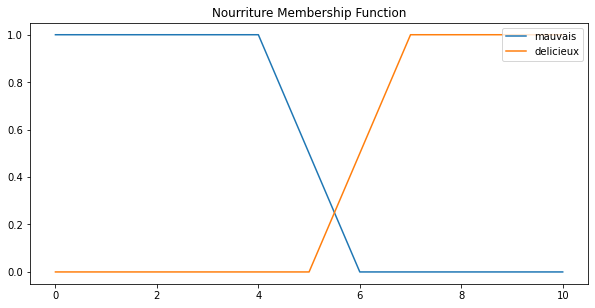

In [7]:
plt.figure(figsize=(10,4.8))
plt.title("Nourriture Membership Function")
plt.plot(x, n_mauvais, label="mauvais")
plt.plot(x, n_delicieux, label="delicieux")

plt.legend(loc="upper right")

### Variable Pourboire

In [8]:
# Membership function for  Service
p_faible = fuzz.trapmf(x,[0,0,2,4])
p_moyen = fuzz.trapmf(x,[3,5,6,8])
p_eleve = fuzz.trapmf(x,[7,9,10,10])

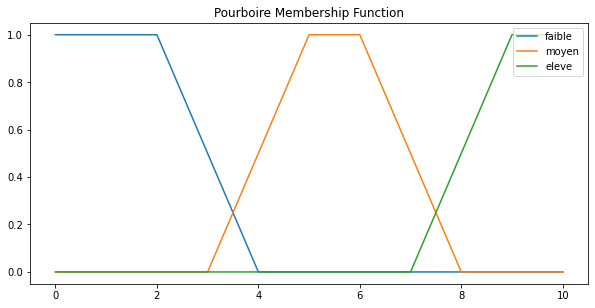

In [9]:
plt.figure(figsize=(10,4.8))
plt.title("Pourboire Membership Function")
plt.plot(x, p_faible, label="faible")
plt.plot(x, p_moyen, label="moyen")
plt.plot(x, p_eleve, label="eleve")
plt.legend(loc="upper right")

## Intersection of membership function with poin projection

In [26]:
v = 3
xf = np.argwhere(np.diff(np.sign(x - v))).flatten()[-1]
xf

12

In [27]:
x

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

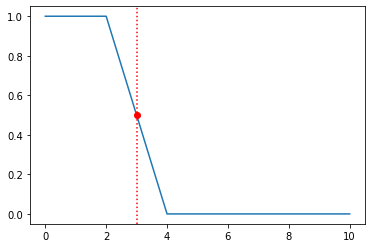

In [28]:
plt.plot(x, p_faible, label="faible")
plt.plot(x[xf], p_faible[xf], 'ro')
plt.axvline(x=v, linestyle=':', color='red')
